# Tutorial: Breast Cancer Classification through Deep Learning in TensorFlow

In [3]:
# Short TensorFlow Video
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/oZikw5k_2FM" frameborder="0" allowfullscreen></iframe>')

## Introduction

Deep learning is the bleeding edge of machine learning today. Loosely inspired by how the brain works, deep learning uses layers of "artificial neurons" connected by edges and learns the weights of those edges to produce a final output. Artificial neural networks can be used to learn complicated functions, and deep learning has had remarkable results in image and speech recognition.

Here's a diagram of a neural network. It has several layer of nodes, including an input layer, hidden layers, and an output layer. When you have multiple hidden layers, it's called "deep learning." The objective of this algorithm is to learn the weights of the edges between the nodes that minimize loss on the training set.
<img src="ann_image.png" alt="Neural Network" style="width: 350px;"/>

Recent advancements in artificial intelligence such as object recognition, speech processing, and even Google's AlphaGo have been driven by deep learning. Although the basic idea behind neural networks has been around for decades, advances in computational power have made it possible to assemble layers of virtual neurons, paving the way for deep learning.

This tutorial will introduce you to [TensorFlow](https://www.tensorflow.org/), a deep learning library developed by Google.

We will accomplish two tasks using TensorFlow:
1. Part I: Linear regression with polynomial features
2. Part II: Breast cancer cell classification through deep learning

By the end of the tutorial, you'll be able to train and test your own deep learning neural networks in Tensorflow.

## Part I: Linear Regression with TensorFlow

We'll start out with a relatively simple task, linear regression with polynomial features. It may seem like an unnecessary workaround to use a deep learning library for linear regression. However, doing this excercise will introduce you to the mechanics of Tensorflow, giving you an idea of how the library works.

In [468]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9,6]
import seaborn

#### Defining the Task

We'll start out by creating some data which we want to model. Our true regression function will look like this:
$$\mathbf y = 3x^2 + 0.5x + 10 + \mathbf \epsilon$$

Let's create some data from our true regression function. Notice how the data has a parabolic shape, since we're doing linear regression with polynomial features.

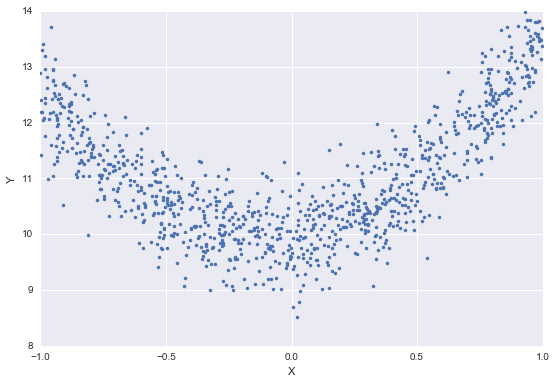

In [469]:
x = np.random.uniform(-1, 1, 1000).astype(np.float32)
yActual = 3 * x**2 + 0.5 * x + 10 + np.random.normal(0, 0.5, 1000)
plt.plot(x, yActual, '.')
plt.xlabel('X')
plt.ylabel('Y')

Our goal is to come up with a best fit curve for this data. We can then use this curve to predict the Y values for new instances of X.

Our estimated regression model will look like this:
$$\mathbf y = \mathbf \beta_2 x^2 + \mathbf \beta_1 x + \mathbf \beta_0$$

We will train a linear regression model to learn the values of ($\beta_0, \beta_1, \beta_2$) that best fit the data.

#### Creating the Model Parameters

We represent our model's parameters as Tensorflow Variables. Variables in TensorFlow are repeatedly updated during the Gradient Descent stage (later on). We'll initialize these variables to zero.

In [470]:
b0 = tf.Variable(tf.zeros([1]))
b1 = tf.Variable(tf.zeros([1]))
b2 = tf.Variable(tf.zeros([1]))

#### Defining our Model

Constructing a model in Tensorflow is as easy as stringing together your model parameters and inputs.

In [471]:
y = b2 * x**2 + b1 * x + b0

#### Loss Function and Optimizer

We'll need a loss function to evaluate how well our model performs as we run the algorithm. Here, we choose the Mean Squared Error (MSE) loss function, which measures the mean of the squared differences between our predicted and actual values of y.

To minimize the loss function, we will need an optimization algorithm. The TensorFlow API offers several optimizers, but we'll stick to the Gradient Descent optimizer. We'll need to choose a learning rate, which specifies how large a step the algorithm takes towards a better choice of parameters in each step of gradient descent. If the learning rate is too small, gradient descent will take a long time to converge; if the learning rate is too large, gradient descent may overshoot the optimal parameters. We'll set the learning rate to 0.5.

Finally, we'll define our training step to minimize our MSE loss function.

In [472]:
loss = tf.reduce_mean(tf.square(y - yActual))
optimizer = tf.train.GradientDescentOptimizer(0.5)
trainStep = optimizer.minimize(loss)

#### Training the Model

In this step, we train the linear regression model through gradient descent. First, we initialize our model variables and a Tensorflow Session. Then, we do 500 iterations of gradient descent and get the final estimates of our model parameters ($\beta_0, \beta_1, \beta_2$).

In [473]:
# Initializing the model variables
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Doing 500 iterations of Gradient Descent
for i in range(500):
    sess.run(trainStep)
    if i%100 == 0:
        print (i, sess.run(b2[0]), sess.run(b1[0]), sess.run(b0[0]))

# Final estimates of parameters
b2Estimate = sess.run(b2)[0]
b1Estimate = sess.run(b1)[0]
b0Estimate = sess.run(b0)[0]

(0, 3.9691322, 0.22373834, 11.004008)
(100, 3.0496058, 0.50383914, 9.9796209)
(200, 3.0495212, 0.5038389, 9.9796515)
(300, 3.0495212, 0.5038389, 9.9796515)
(400, 3.0495212, 0.5038389, 9.9796515)


#### Plot the Best Fit Curve

With our estimated parameters ($\beta_0, \beta_1, \beta_2$), we can now plot a best-fit curve to our data. We simply create an array of the fitted values from our regression model and then plot those values as a curve on top of our scatterplot of data.

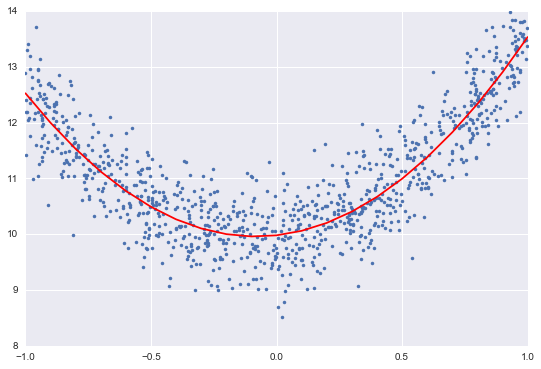

In [474]:
xValues = np.arange(-1,1.1,0.1)
yPred = b2Estimate * xValues**2 + b1Estimate * xValues + b0Estimate
plt.plot(x, yActual, '.')
plt.plot(xValues, yPred, color='r')

And that's it! You've just learned how to do linear regression with polynomial features in TensorFlow. Soon, you'll soon see how these basic TensorFlow concepts translate to a more advanced task - classification using neural networks.

## Part II: Breast Cancer Cell Classification using Deep Learning

In our second task, we will use deep learning to classify cells as malignant or benign for breast cancer. We're given a dataset that consists of features extracted from a digitized image of a breast mass. We will use features such as  average radius and average concavity of the cells in the sample to train our neural network. Then, we will classify new samples as malignant or benign.

The reason that a neural network is a good choice for this problem is because the dataset has a large feature space (32 attributes) from which we care mainly about accurate classifications, and not about understanding the intuition behind those classifications.

<img src="cancer_cell_image.jpg" alt="Cancer celks" style="width: 300px;"/>

This kind of application of machine learning in health domains has tremendous potential. Imagine how useful it would be for a doctor to back-up his/her diagnosis of a patient with confirmation from our neural network. The challenge here is that we need our classifications to be extremely accurate, since it can mean the difference between life and death. Diagnosing cancer is very different from recommending movies or products.

#### The Dataset

This is a [popular dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) compiled by the University of Wisconsin in 1992. Many papers have been published about classification on this dataset, using techniques such as SVM, Logistic Regression, and Neural Networks.

Each row of the data contains a summary for many cells in the sample, not only for a single cell. The summary metrics are: mean, standard deviation, and "worst" (or largest). The three summary metrics are given for the following attributes:
1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour) 
9. symmetry 
10. fractal dimension

There are also two more variables:
1. ID number - we don't care about this
2. Diagnosis (M = malignant, B = benign) - our target variable

In all, we have 569 instances with 32 attributes per instance.

In [499]:
cancerDF = pd.read_csv('cancer_data.csv')
cancerDF.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


#### Data Processing
We'll take the following steps for data processing:
1. Filter Mean Features - For simplicity, we'll consider only the features for the mean values (10 features), leaving out the standard deviation and worst features. This will reduce our feature space substantially, making our algorithm faster and perhaps more generalizable.
2. One-hot encoding of labels - This is the format our neural network will require.
3. Split train/test sets - We'll split the data into 2 sets: 70% for training and 30% for testing.
4. Normalize (scaling) features - This is really important. We need to normalize features so that they are scaled similarly. Otherwise, gradient descent may take too long to converge. We'll normalize each feature so that they have zero mean and unit variance.

In [500]:
# Filter out mean features from the dataset
meanFeatures = filter(lambda x: 'mean' in x, list(cancerDF.columns.values))
X = cancerDF.loc[:,meanFeatures].as_matrix().astype(np.float32)

# Labels: 'Malignant' => 1, 'Benign' => 0
labels = (cancerDF.loc[:, 'diagnosis'] == 'M').astype(int)
y = np.eye(2)[labels]   # One-hot encoding

# Split into train and test sets
np.random.seed(0)
perm = np.random.permutation(len(y))
trainIndices = perm[:int(len(perm) * 0.7)]
testIndices = perm[int(len(perm) * 0.7):]
X_train = X[trainIndices,:]
y_train = y[trainIndices]
X_test = X[testIndices,:]
y_test = y[testIndices]

# Normalize features (zero mean, unit variance)
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

#### Creating Network Topology, Model Parameters, and Hyperparameters

Before we do any learning, we have to design our neural network and define it using Tensorflow variables. In our network, we'll have one input layer with 10 nodes, since that's the number of input features we're using. We'll have 3 hidden layers with 8, 6, and 4 nodes respectively. Finally, we'll have an output layer with 2 nodes, for the number of classes of our output.

Using multiple hidden layers is what makes this deep learning. The more layers we add to our network, the more complex it becomes. At the same time, adding layers makes the neural network more prone to overfitting. Finding the right number of hidden layers and units in each layer can be done through cross-validation.

We set up our model parameters weights and biases as Tensorflow random variables. Also, we define our model inputs as X and y, which will be fed into our neural network later on for training and classification.

In [501]:
# Network Topology
numInputs = len(X_train[0])
numHiddenUnitsLayer1 = 8
numHiddenUnitsLayer2 = 6
numHiddenUnitsLayer3 = 4
numClasses = 2

# Model Parameters
weights = {
    'hiddenLayer1': tf.Variable(tf.random_normal([numInputs, numHiddenUnitsLayer1])),
    'hiddenLayer2': tf.Variable(tf.random_normal([numHiddenUnitsLayer1, numHiddenUnitsLayer2])),
    'hiddenLayer3': tf.Variable(tf.random_normal([numHiddenUnitsLayer2, numHiddenUnitsLayer3])),
    'outputLayer': tf.Variable(tf.random_normal([numHiddenUnitsLayer3, numClasses]))
}

biases = {
    'hiddenLayer1': tf.Variable(tf.random_normal([numHiddenUnitsLayer1])),
    'hiddenLayer2': tf.Variable(tf.random_normal([numHiddenUnitsLayer2])),
    'hiddenLayer3': tf.Variable(tf.random_normal([numHiddenUnitsLayer3])),
    'outputLayer': tf.Variable(tf.random_normal([numClasses]))
}

# Model Inputs
X = tf.placeholder(tf.float32, [None, numInputs])
y = tf.placeholder(tf.float32, [None, 2])

# Model Hyperparameters
learningRate = 0.01
epochs = 10000
trainingIters = 10

#### Defining our Deep Learning Model

This step is known as forward propagation (or feed forward) and forms the crux of our neural network algorithm. In this step, we feed our model an input, which then goes through a series of linear combinations at each level of the network, resulting in a final output at the end.

More specifically, at each layer of the network, we compute a matrix multiplication of the output from the previous layer and the weights connecting the previous layer to the current layer. Then, we add the bias at the current layer. Finally, we apply an activation function to our result (in this case a Sigmoid function), which converts the weighted result into a value between 0 and 1, indicating the classification at that layer.

We will be using forward propagation in two ways:
1. Training - At each step of gradient descent, we do forward propagation with the current model parameters to get an output. Then we use a technique called backpropagation to adjust our parameters to minimize loss from that output.
2. Classification - forward propagation is the entirety of the classification step. We provide an input and get a classification as output.

In [502]:
def forwardPropagate(X, weights, biases):
    hiddenLayer1Output = tf.add(tf.matmul(X, weights['hiddenLayer1']), biases['hiddenLayer1'])
    hiddenLayer1Activation = tf.nn.sigmoid(hiddenLayer1Output)
    hiddenLayer2Output = tf.add(tf.matmul(hiddenLayer1Activation, weights['hiddenLayer2']), biases['hiddenLayer2'])
    hiddenLayer2Activation = tf.nn.sigmoid(hiddenLayer2Output)
    hiddenLayer3Output = tf.add(tf.matmul(hiddenLayer2Activation, weights['hiddenLayer3']), biases['hiddenLayer3'])
    hiddenLayer3Activation = tf.nn.sigmoid(hiddenLayer3Output)
    output = tf.matmul(hiddenLayer3Activation, weights['outputLayer']) + biases['outputLayer']
    return output

prediction = forwardPropagate(X, weights, biases)

#### Loss Function and Optimizer

We will use a cross entropy loss function, which is good for discrete-valued outputs. We will optimize this loss function using gradient descent.


In [503]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y))
optimizer = tf.train.GradientDescentOptimizer(learningRate)
trainStep = optimizer.minimize(loss)

corr = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, "float"))

#### Training the Neural Network

Now that we have all our parameters set up, we can finally train our network. We train our network for trainingIter (10) iterations, starting out with different random initializations for our parameters in each iteration.

Within each iteration, we run epochs (10000) iterations of gradient descent, in which we forward propagate using every input in our training data and minimize the cross entropy loss. We hold on to the parameters that give us the best training loss and then set the final model weights and biases using those best estimates of our parameters.

Finally, we can determine the training set accuracy of our model.

In [506]:
bestAccuracy = -1
bestWeightsEstimates = None
bestBiasesEstimates = None

for i in xrange(trainingIters):
    # Initializing the model variables
    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)

    # Train the model once per epoch
    for epoch in xrange(epochs):
        sess.run(trainStep, feed_dict={X: X_train, y: y_train})
    
    # Updating bestAccuracy and parameters
    accuracy = sess.run(accr, feed_dict={X: X_train, y: y_train})
    if accuracy > bestAccuracy:
        bestAccuracy = accuracy
        bestWeightsEstimates = sess.run(weights)
        bestBiasesEstimates = sess.run(biases)

# Updating model parameters to the best estimates
sess = tf.Session()
for weightType in weights:
    sess.run(weights[weightType].assign(bestWeightsEstimates[weightType]))
for biasType in biases:
    sess.run(biases[biasType].assign(bestBiasesEstimates[biasType]))

accuracy = sess.run(accr, feed_dict={X: X_train, y: y_train})
print "Training set accuracy:", accuracy

Training set accuracy: 0.954774


#### Classifying Test Instances

We can now use our trained model to classify new instances and report our test set accuracy. The results are quite impressive!

In [508]:
pred = np.argmax(sess.run(prediction, feed_dict={X: X_test}), axis=1)
print "Classifications for test instances:", pred

testAccuracy = sess.run(accr, feed_dict={X: X_test, y: y_test})
print "Test set accuracy:", testAccuracy

Classifications for test instances: [0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]
Test set accuracy: 0.964912


## Further Reading

If you are interested in learning more about deep learning, here are some resources I would recommend:
1.  [Udacity Deep Learning](https://www.udacity.com/course/deep-learning--ud730) - free video lectures and assignments teaching both theory and practice of deep learning.
2. [Deep Learning Guide](http://neuralnetworksanddeeplearning.com/) - goes deep into the theory of neural networks.
3. [Deep Learning Playground](http://playground.tensorflow.org/) - cool visualization of deep learning in your browser.
4. [Comparative Analysis of Machine Learning Methods for Breast Cancer Dataset](http://file.scirp.org/pdf/OALibJ_2016031015403611.pdf) - a comparative analysis of different machine learning algorithms on the dataset we used.

In [509]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/DcSWmoiLhzY" frameborder="0" allowfullscreen></iframe>')

Perahaps one day, it will be data scientists, and not only doctors and researchers, who will find the cure for cancer.